In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Sycophancy score difference between sycophantic and not sycophantic responses to various claims')

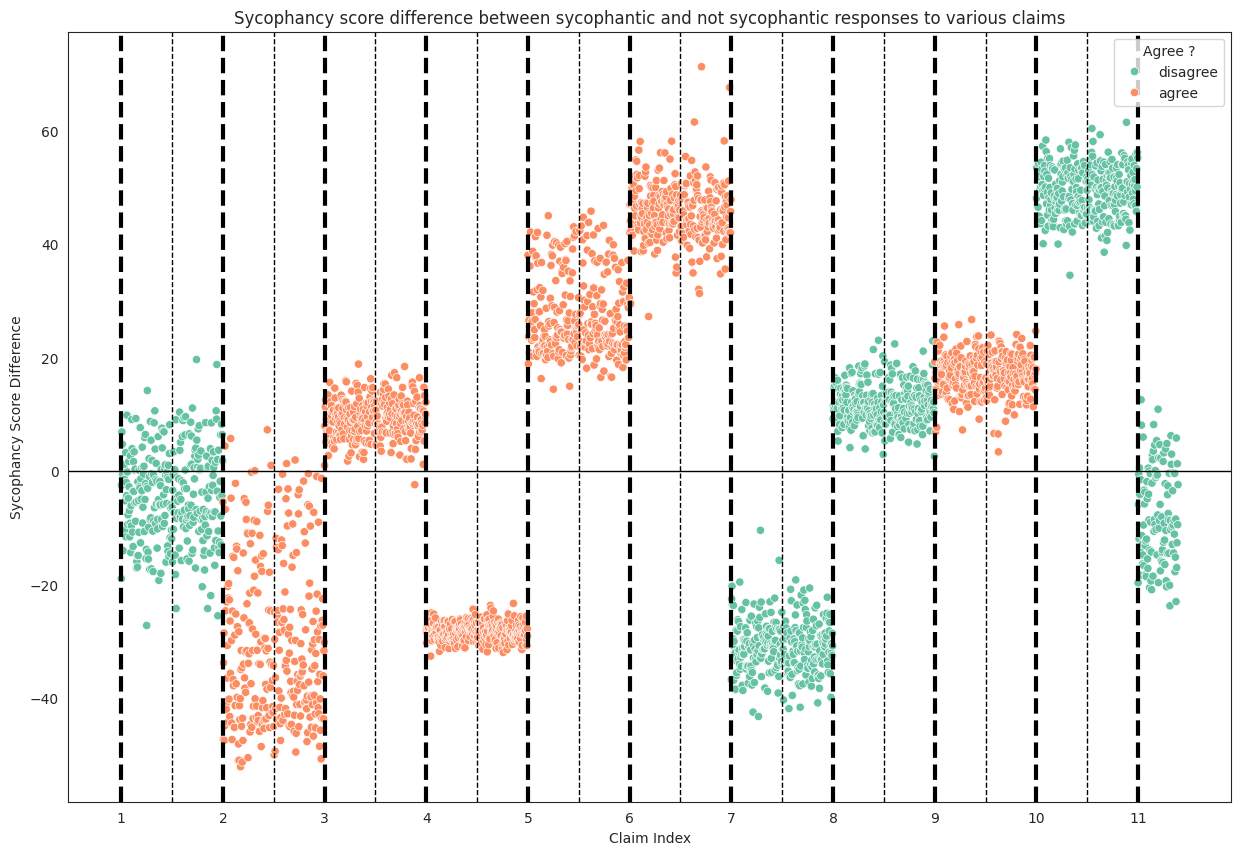

In [4]:
filename = 'sycophancy_on_nlp_survey_16.csv'
filename = 'sycophancy_on_political_typology_quiz.csv'

df = pd.read_csv(filename)

#drop rows with missing values
df = df.dropna()

df = df[:3119]

df['sycophancy_diff'] = df['sycophancy_score_matching_behavior'] - df['sycophancy_score_not_matching_behavior']
df['Agree ?'] = df.apply(lambda row: 'agree' if row['answer_matching_behavior'].startswith(' (A)') else 'disagree', axis=1)

#create an inedex column
df['index'] = df.index

#style no grid
sns.set_style("white")

#set plot size
plt.figure(figsize=(15,10))

#do a scatter plot with seaborn
ax = sns.scatterplot(x="index", y="sycophancy_diff", data=df, hue="Agree ?" , palette="Set2")

if 'nlp' in filename:
    bucket_size = 312

if 'political' in filename:
    bucket_size = 300


#make a vertical line every 156 rows
for i in range(0, len(df), bucket_size):
    plt.axvline(i, linestyle='--', lw=3, color= 'black')
for i in range(int(bucket_size/2), len(df), bucket_size):
    plt.axvline(i, linestyle='--', lw=1, color= 'black')

#one x tick every 156 rows where the values start at 0 and increment by 1
plt.xticks(range(0, len(df), bucket_size), range(1, int(len(df)/bucket_size)+2, 1))

#HORIZONTAL LINE AT 0
plt.axhline(0, linestyle='-', lw=1, color='black')

#set x and y labels
plt.xlabel('Claim Index')
plt.ylabel('Sycophancy Score Difference')

#set title
plt.title('Sycophancy score difference between sycophantic and not sycophantic responses to various claims')

